<a href="https://colab.research.google.com/github/mikewig/EDA-Group/blob/feature%2Fpreprocessing/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis en el ambito de la ciberseguridad
## Cybersecurity 🪪 Intrusion 🦠 Detection Dataset
Este conjunto de datos de detección de intrusiones de ciberseguridad está diseñado para detectar ciberintrusiones basándose en el tráfico de red y el comportamiento del usuario. A continuación, explicaré cada aspecto en detalle, incluyendo la estructura del conjunto de datos, la importancia de las características, los posibles enfoques de análisis y cómo se puede utilizar para el aprendizaje automático.

[Data set](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset/data)

Proyecto inicial análisis EDA  Michael López
Colaboradores:


* Polina Pavlova
* Stephany Lizarraga  
* Andrea Alonso
* Juan Carlos Macías

Abril del 2025



Network-Based Features
1. network_packet_size: The size of network packets, ranging between 64 to 1500 bytes. Packets on the lower end (aprox. 64 bytes) may indicate control messages, while larger packets (~1500 bytes) often carry bulk data. Attackers may use abnormally small or large packets for reconnaissance or exploitation attempts.

2. protocol_type: The protocol used in the session (TCP, UDP, or ICMP). TCP (Transmission Control Protocol): Reliable, connection-oriented (common for HTTP, HTTPS, SSH). UDP (User Datagram Protocol): Faster but less reliable (used for VoIP, streaming). ICMP (Internet Control Message Protocol): Used for network diagnostics (ping); often abused in Denial-of-Service (DoS) attacks.

3. encryption_used (Encryption Protocol): AES (Advanced Encryption Standard): Strong encryption, commonly used. DES (Data Encryption Standard): Older encryption, weaker security. None: Indicates unencrypted communication, which can be risky. Attackers might use no encryption to avoid detection or weak encryption to exploit vulnerabilities.

User Behavior-Based Features
1. login_attempts: High values might indicate brute-force attacks (repeated login attempts). Typical users have 1–3 login attempts, while an attack may have hundreds or thousands.

2. session_duration: A very long session might indicate unauthorized access or persistence by an attacker. Attackers may try to stay connected to maintain access.

3. failed_logins: High failed login counts indicate credential stuffing or dictionary attacks. Many failed attempts followed by a successful login could suggest an account was compromised.


4. unusual_time_access: A binary flag (0 or 1) indicating whether access happened at an unusual time. Attackers often operate outside normal business hours to evade detection.

5. ip_reputation_score (Trustworthiness of IP Address): A score from 0 to 1, where higher values indicate suspicious activity. IP addresses associated with botnets, spam, or previous attacks tend to have higher scores.

6. browser_type (User’s Browser): Common browsers: Chrome, Firefox, Edge, Safari. Unknown: Could be an indicator of automated scripts or bots.

7. attack_detected (Target Variable): Binary classification: 1 means an attack was detected, 0 means normal activity. The dataset is useful for supervised machine learning, where a model learns from labeled attack patterns.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [34]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [35]:
df = pd.read_csv("cybersecurity.csv")
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [37]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [38]:
print(df.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


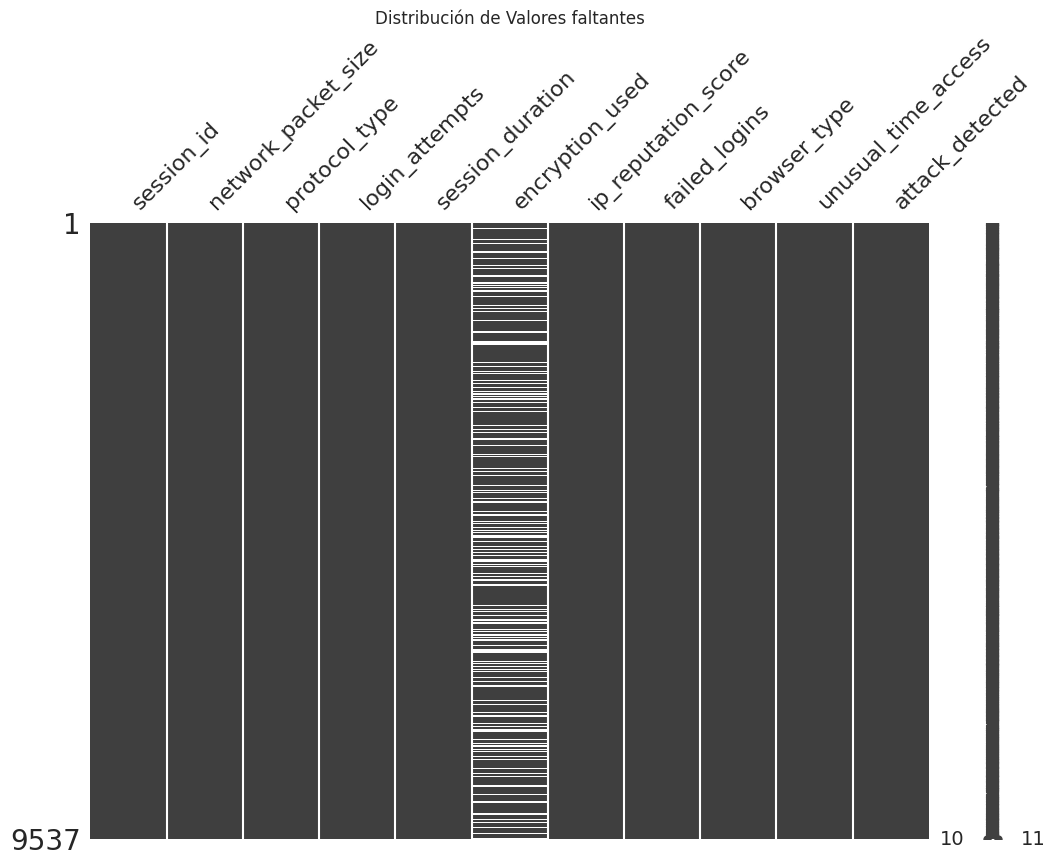

In [39]:
msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores faltantes')
plt.show()

In [40]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

,0
session_id,0.000000
network_packet_size,0.000000
protocol_type,0.000000
login_attempts,0.000000
session_duration,0.000000
encryption_used,20.614449
ip_reputation_score,0.000000
failed_logins,0.000000
browser_type,0.000000
unusual_time_access,0.000000


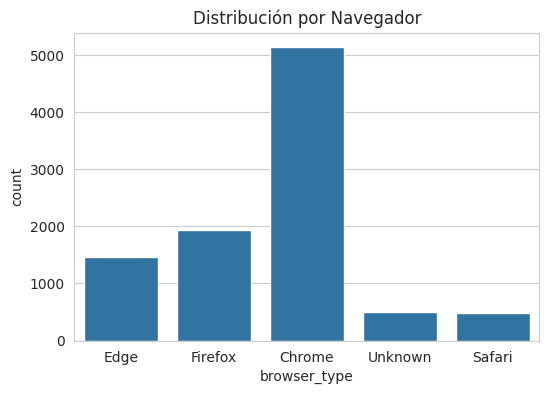

In [41]:
sns.countplot(x="browser_type", data=df)
plt.title("Distribución por Navegador")
plt.show()

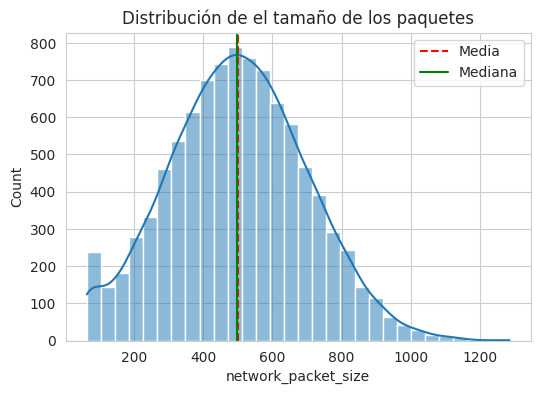

In [42]:
sns.histplot(df["network_packet_size"], kde=True, bins=30)
plt.title("Distribución de el tamaño de los paquetes")
plt.axvline(df["network_packet_size"].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df["network_packet_size"].median(), color='g', linestyle='-', label='Mediana')
plt.legend()
plt.show()

<ipython-input-43-6f111d6b315b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_detected",data=df,palette="Blues")


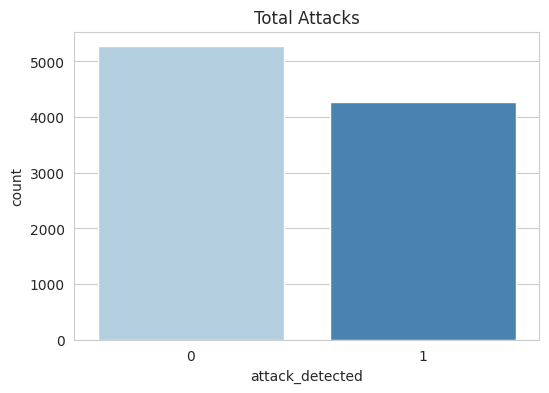

In [43]:
sns.countplot(x="attack_detected",data=df,palette="Blues")
plt.title("Total Attacks")
plt.show()

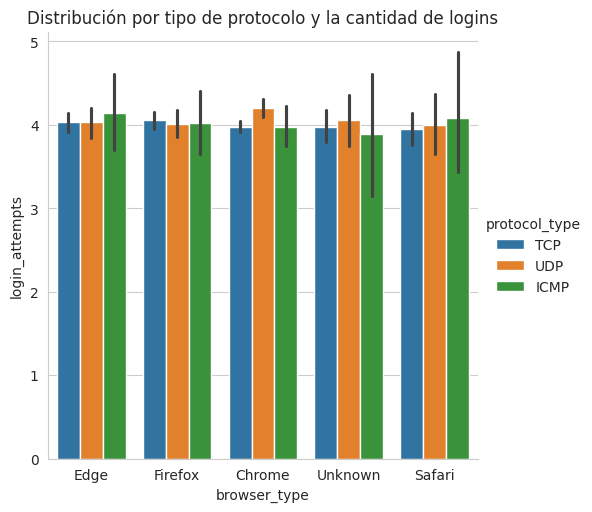

In [44]:
sns.catplot(x="browser_type", y="login_attempts", hue="protocol_type", kind="bar", data=df)
plt.title("Distribución por tipo de protocolo y la cantidad de logins")
plt.show()

In [45]:
from scipy import stats
# Lista de navegadores
navegadores = ["Edge", "Firefox", "Chrome", "Unknown", "Safari"]
df = df[df['browser_type'].isin(navegadores)]
# Separar datos por navegador
relevant_column = 'login_attempts'
edge = df[df['browser_type'] == "Edge"][relevant_column]
firefox = df[df['browser_type'] == "Firefox"][relevant_column]
chrome = df[df['browser_type'] == "Chrome"][relevant_column]
unknown = df[df['browser_type'] == "Unknown"][relevant_column]
safari = df[df['browser_type'] == "Safari"][relevant_column]


# analizar ANOVA test
# https://www.datacamp.com/es/tutorial/anova-test
f_statistic, p_value = stats.f_oneway(edge, firefox, chrome, unknown, safari)

# Mostrar los resultados
print("ANOVA Test - Comparación entre navegadores")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.3f}")

# Interpretación 5%, basado en los resultados significativos de un porcentaje de 0.05 (5%)
if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa entre al menos dos navegadores.")
else:
    print("No hay diferencias significativas entre los navegadores.")

ANOVA Test - Comparación entre navegadores
F-Statistic: 0.18
P-Value: 0.951
No hay diferencias significativas entre los navegadores.


### Crear Profile Report

In [46]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Reporte Inicial", explorative=True)
profile.to_file("output_initial.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 16.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
from IPython.display import HTML # import the HTML object
HTML(filename='output_initial.html') # render the file as a web page

### Tratar missing data

In [48]:
valores_unicos_columna = df['encryption_used'].unique()
valores_unicos_columna

array(['DES', 'AES', nan], dtype=object)

In [49]:
df2 = df.copy()

In [50]:
df2['encryption_used'] = df2['encryption_used'].fillna('None') #tras leer la documentación. el nan significa no encriptado, no es dato perdido

In [51]:
df2 = df2.drop(columns=['session_id']) # no es útil para la analítica, solo identifica la sessión

### Codificar variables categoricas

In [52]:
df2 = pd.get_dummies(df2, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True) #get_dummies usa OneHot Encoding! drop_first elimina la primera columna, la original, prque ya está representada por otras True/False

In [53]:
df2.sample()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,encryption_used_None,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
9140,499,8,167.953425,0.36435,1,0,1,True,False,False,False,False,False,True,False


### Escalar las variables numericas

In [54]:
from sklearn.preprocessing import StandardScaler # transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que ayuda a que las características (o variables) estén en la misma escala
scaler = StandardScaler()
numerical_columns = ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins']
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])# fit solo calcula la media y la desviacion tipica, el transform hace toda la formula (lo transforma a 0 y 1)

In [55]:
df2.sample()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,protocol_type_TCP,protocol_type_UDP,encryption_used_DES,encryption_used_None,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
2735,-0.54157,-1.035242,-0.194272,-0.929604,-1.467959,0,0,True,False,False,False,False,False,True,False


### Correlación

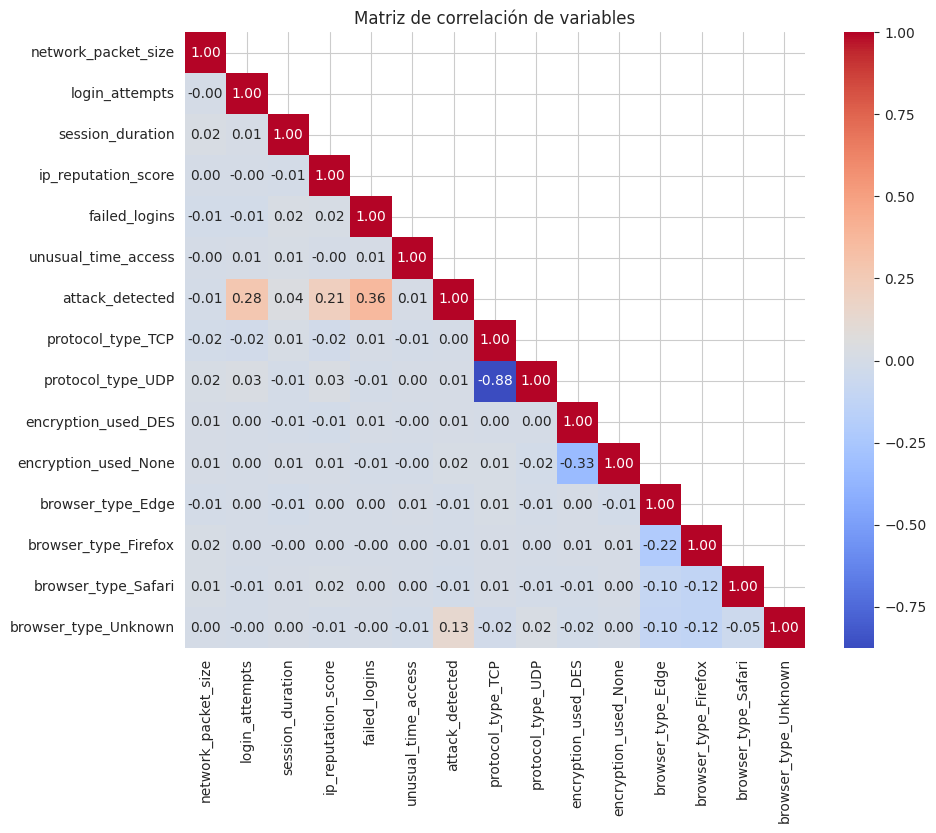

In [61]:
import numpy as np

matrix = df2.corr()
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
sns.heatmap(matrix, cmap="coolwarm", mask=mask, annot=True, fmt=".2f", cbar=True)
plt.title('Matriz de correlación de variables')
plt.show()



- Fuerte correlación negativa (-0.88) entre protocol_type_TCP y protocol_type_UDP, lo cual tiene sentido ya que estos son tipos de protocolo mutuamente excluyentes.

- Correlación negativa moderada (-0.33) entre encryption_used_DES y encryption_used_None, lo que indica que cuando se utiliza el cifrado DES, es poco probable que no se use cifrado (como se esperaba).

- Correlación positiva moderada (0.36) entre failed_logins y attack_detected, sugiriendo que los intentos de inicio de sesión fallidos pueden estar asociados con ataques detectados.

- Correlación positiva débil (0.28) entre login_attempts y attack_detected, indicando alguna relación entre la frecuencia de los intentos de inicio de sesión y los ataques detectados.

- Correlación positiva débil (0.21) entre ip_reputation_score y attack_detected, sugiriendo que la reputación de la IP tiene cierto valor predictivo para la detección de ataques.

- Pequeñas correlaciones negativas entre los tipos de navegador, lo que indica que son categorías mutuamente excluyentes.